# Various tests for interpolation

Copyright 2024 Stephan Kulla ("Kulla")

Licensed under the Apache License, Version 2.0 (the "Apache License") and Creative Commons Attribution 4.0 International (the "CC-BY License"). You may choose either of these licenses to govern your use of this project.

You may obtain a copy of the Apache License at:
    http://www.apache.org/licenses/LICENSE-2.0

You may obtain a copy of the CC-BY License at:
    https://creativecommons.org/licenses/by/4.0/

Unless required by applicable law or agreed to in writing, software and content distributed under the Apache License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the Apache License for the specific language governing permissions and limitations under the License.

Under the CC-BY License, you are free to share and adapt the material provided you give appropriate credit, provide a link to the license, and indicate if changes were made. See the CC-BY License for full details.

Third-Party Components and Licenses:
This product also includes third-party components which are distributed under their respective licenses. Please refer to the NOTICE file for details.

## Utility functions and imports

In [1]:
%load_ext jupyter_ai_magics

## Render legendre polynomials

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

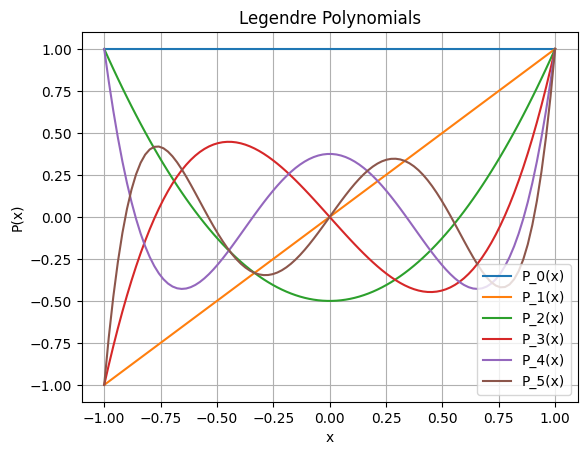

In [3]:
x = np.linspace(-1, 1, 100)  # Range from -1 to 1

for n in range(6):  # Orders 0 to 5
    Pn = legendre(n)
    y = Pn(x)
    plt.plot(x, y, label=f'P_{n}(x)')

plt.title('Legendre Polynomials')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid(True)
plt.show()

# Approximate sine function with legendre polynomials

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
from scipy.integrate import quad

In [5]:
def sine_function(x):
    return np.sin(np.pi * x)  # Adjusted to fit within the interval [-1, 1]

def legendre_approximation(x, n):
    # Calculate the coefficients for the Legendre polynomial approximation
    coefficients = []
    for k in range(n + 1):
        Pk = legendre(k)
        # Calculate the coefficient using the orthogonality relation
        c_k, _ = quad(lambda x: sine_function(x) * Pk(x), -1, 1)
        c_k /= (2/(2*k + 1))  # Normalize by the integral of Pk^2 over [-1, 1]
        coefficients.append(c_k)
    # Sum the series
    approximation = sum(c_k * legendre(k)(x) for k, c_k in enumerate(coefficients))
    return approximation

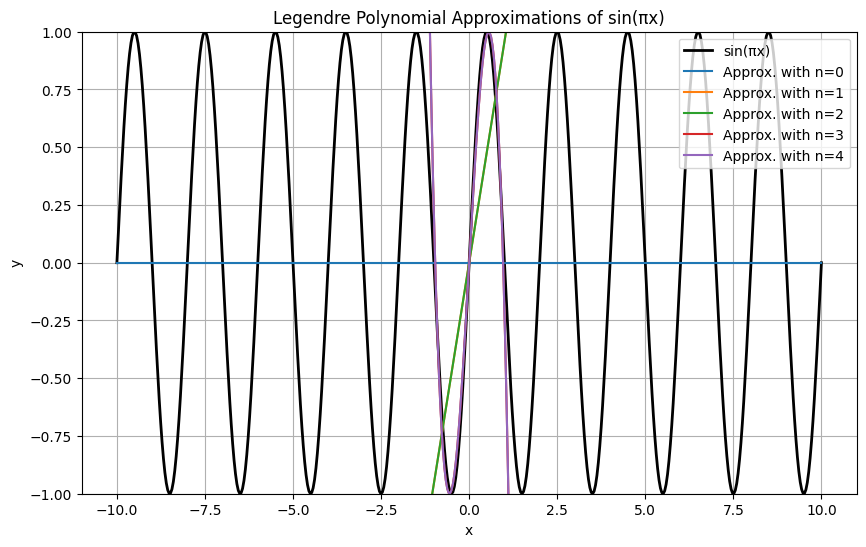

In [11]:
x = np.linspace(-10, 10, 500)
y_true = sine_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='sin(πx)', color='black', linewidth=2)

for n in range(5):
    y_approx = legendre_approximation(x, n)
    plt.plot(x, y_approx, label=f'Approx. with n={n}')

plt.title('Legendre Polynomial Approximations of sin(πx)')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((-1,1))
plt.legend()
plt.grid(True)
plt.show()

## Werte der Integrale für die Sinus-Funktion

In [21]:
from sympy import Symbol, sin, integrate

x = Symbol("x")

for n in range(11):
    v = integrate((10-x)**n * sin(x), (x,-10,10))
    print(f"for n={n}: v={v}")

for n=0: v=0
for n=1: v=20*cos(10) - 2*sin(10)
for n=2: v=400*cos(10) - 40*sin(10)
for n=3: v=7880*cos(10) - 1188*sin(10)
for n=4: v=155200*cos(10) - 31520*sin(10)
for n=5: v=3042400*cos(10) - 776240*sin(10)
for n=6: v=59344000*cos(10) - 18254400*sin(10)
for n=7: v=1152219200*cos(10) - 415397920*sin(10)
for n=8: v=22276736000*cos(10) - 9217753600*sin(10)
for n=9: v=429040217600*cos(10) - 200491349760*sin(10)
for n=10: v=8235093760000*cos(10) - 4290402176000*sin(10)


In [27]:
from sympy import Integral

x = Symbol("x")

for n in range(11):
    v = Integral((10-x)**n * sin(x), (x,-10,10)).evalf()
    print(f"for n={n}: v={v}")

for n=0: v=0E-100
for n=1: v=-15.6933883597503
for n=2: v=-313.867767195006
for n=3: v=-5965.58656938587
for n=4: v=-113076.355897432
for n=5: v=-2130500.27294543
for n=6: v=-39863081.8548941
for n=7: v=-740809088.075713
for n=8: v=-13677122384.9760
for n=9: v=-250923904596.781
for n=10: v=-4575763355341.46
